<a href="https://colab.research.google.com/github/Charly1368/Modulo-2---Modelos-Estad-sticos/blob/main/Generacion_v_a_Cauchy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generación y uso de variables aleatorias

Daremos recopilación de métodos para generar variables aleatorias utilizados en simulación computacional. Se abordan distribuciones uniformes, exponenciales, normales, binomiales y Poisson, entre otras, así como técnicas como la transformada inversa y el método del rechazo.

Ejemplos comunes en simulación:
- Tiempo entre llegada de cada persona  
- Número de personas por minuto  
- Número de artículos por persona  
- Cantidad de dinero ganado cada hora  
- Tiempo de atención por cliente  
- Número de veces que la cajera solicita ayuda durante la jornada  
- Cantidad de gente que está formada  
- Número de personas que pagan con tarjeta

## Métodos de generación de números aleatorios rectangulares

La generación de variables aleatorias con esta distribución es importante porque las variables que tengan una distribución diferente, tendrán que usar a ésta como base.

- Cada posible resultado entre $a$ y $b$ tiene la misma probabilidad $1/n$.

Las variables generadas deben cumplir con:
- Los valores generados deben ser independientes y estar idénticamente distribuidos
- La secuencia generada debe ser lo más larga posible y ser reproducibles
- Debe permitir generar múltiples secuencias
- Que usen poca memoria

Históricamente se han usado cuatro tipos de métodos para generar sucesiones de números rectangulares:
- Métodos manuales
- Tablas de biblioteca
- Computación analógica
- Computación digital

### Generación pseudoaleatoria

La generación de los números aleatorios rectangulares debe realizarse a través de relaciones matemáticas de recurrencia. Por esta razón se consideran **pseudoaleatorios**, ya que el proceso para generarlos es determinístico.

Hay dos métodos que son los más utilizados para la generación. Ambos se basan en la siguiente definición:

**Definición.** Dos enteros $a$ y $b$ son congruentes módulo $m$ si su diferencia es un múltiplo entero de $m$ y se expresa como
$$𝑎 \equiv 𝑏 ( \text{𝑚o𝑑 } 𝑚)$$
Como consecuencia:
- $(a-b)$ es divisible entre $m$
- $a$ y $b$ dan el mismo residuo al ser divididos entre $m$


#### Método congruencial multiplicativo

Generar una secuencia de números pseudoaleatorios uniformes en el intervalo (0, 1) usando la siguiente fórmula recursiva:

$$n_{i+1} = a n_i \mod m$$
- $m$ debe ser tan grande como sea posible, dependiendo de los bits por palabra que maneje la computadora, descontando el bit del signo ($b$). Por lo tanto: $m = 2^b$
- $a$ debe satisfacer que $a \approx 2^{(b+1)/2}$ y que $a \equiv \pm 3 \mod 8$. La segunda expresión equivale a $( a-(\pm3 ) )$ es múltiplo de $8$.
- $n_0$: entero positivo impar menor a $m$
- El periodo será de longitud: $m/4$

#### Método congruencial mixto

Este método genera números pseudoaleatorios con la fórmula:
$$n_{i+1} = (a n_i + c) \mod m$$

**Obs.** Se le llama “mixto” porque incluye una constante adicional $c$ (a diferencia del método multiplicativo).

- $m = 2^b$
- $a \approx 2^{(b-1)/2}$, $a \equiv 1 \mod 4$
- $c$, $n_0$: enteros positivos impares $< m$
- Periodo: $m$

Secuencia generada (Método Congruencial Multiplicativo):
[0.3767452505417168, 0.7534847524948418, 0.13022425444796681, 0.5069637564010918, 0.8837032583542168, 0.2604427603073418, 0.6371822622604668, 0.013921764213591814, 0.3906612661667168, 0.7674007681198418, 0.14414027007296681, 0.5208797720260918, 0.8976192739792168, 0.2743587759323418, 0.6510982778854668, 0.027837779838591814, 0.4045772817917168, 0.7813167837448418, 0.15805628569796681, 0.5347957876510918]


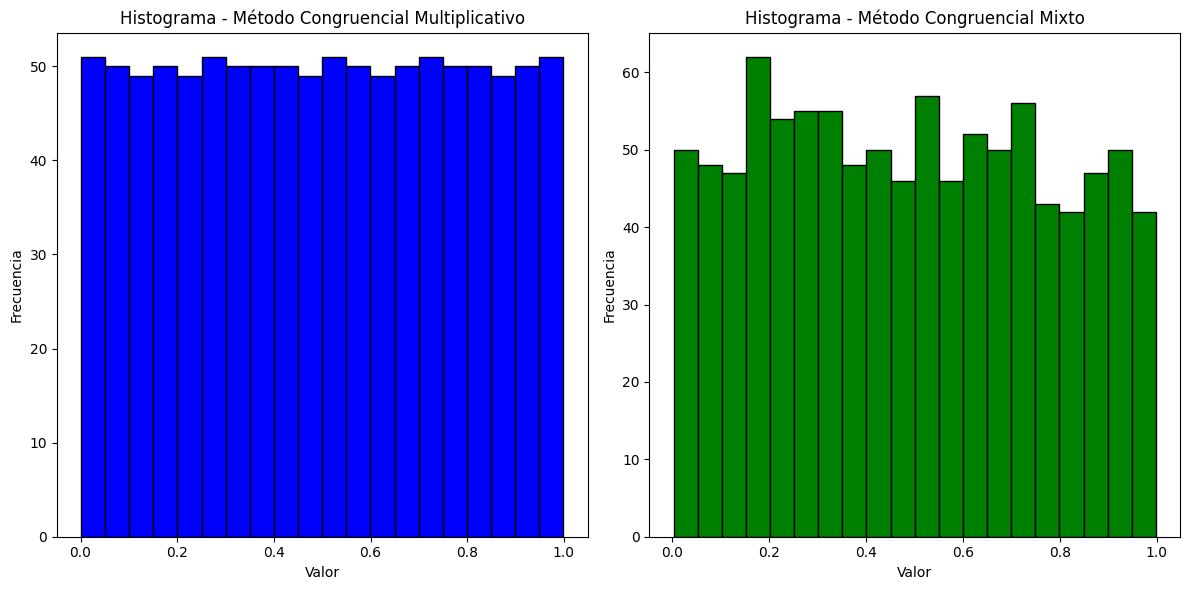

In [ ]:
# n0 : valor inicial o semilla
# a : multiplicador
# m : modulo (2^b)
# n : el número de números que quiero generar


import matplotlib.pyplot as plt

def congruencial_multiplicativo(a, m, n0, num_terms):
    """
    Genera una secuencia de números pseudoaleatorios usando el método congruencial multiplicativo.

    Parámetros:
    a (int): Multiplicador.
    m (int): Módulo.
    n0 (int): Semilla inicial.
    num_terms (int): Número de términos a generar.

    Retorna:
    list: Lista de números pseudoaleatorios en el intervalo (0, 1).
    """
    sequence = []
    n = n0
    for _ in range(num_terms):
        n = (a * n) % m
        sequence.append(n / m)  # Normalizar al intervalo (0, 1)
    return sequence

def congruencial_mixto(a, m, c, n0, num_terms):
    """
    Genera una secuencia de números pseudoaleatorios usando el método congruencial mixto.

    Parámetros:
    a (int): Multiplicador.
    m (int): Módulo.
    c (int): Constante aditiva.
    n0 (int): Semilla inicial.
    num_terms (int): Número de términos a generar.

    Retorna:
    list: Lista de números pseudoaleatorios en el intervalo (0, 1).
    """
    sequence = []
    n = n0
    for _ in range(num_terms):
        n = (a * n + c) % m
        sequence.append(n / m)  # Normalizar al intervalo (0, 1)
    return sequence

# Parámetros para el método congruencial multiplicativo
b = 31  # Número de bits
m = 2 ** b
a_multiplicativo = int(2 ** ((b + 1) / 2))  # a ≈ 2^((b+1)/2)
a_multiplicativo = a_multiplicativo if a_multiplicativo % 8 == 3 or a_multiplicativo % 8 == 5 else a_multiplicativo + 1  # Asegurar que a ≡ ±3 mod 8
n0_multiplicativo = 12345  # Semilla inicial (debe ser un entero positivo impar menor que m)

# Parámetros para el método congruencial mixto
a_mixto = int(2 ** ((b - 1) / 2))  # a ≈ 2^((b-1)/2)
a_mixto = a_mixto if a_mixto % 4 == 1 else a_mixto + 1  # Asegurar que a ≡ 1 mod 4
c_mixto = 12345  # Constante aditiva (debe ser un entero positivo impar menor que m)
n0_mixto = 6789  # Semilla inicial (debe ser un entero positivo impar menor que m)

# Generar secuencias de números pseudoaleatorios
num_terms = 1000  # Número de términos a generar
sequence_multiplicativo = congruencial_multiplicativo(a_multiplicativo, m, n0_multiplicativo, num_terms)
sequence_mixto = congruencial_mixto(a_mixto, m, c_mixto, n0_mixto, num_terms)

# Generar secuencia de números pseudoaleatorios
num_terms = 20
sequence = congruencial_multiplicativo(a, m, n0, num_terms)
print("Secuencia generada (Método Congruencial Multiplicativo):")
print(sequence)

# Graficar histogramas
plt.figure(figsize=(12, 6))

# Histograma para el método congruencial multiplicativo
plt.subplot(1, 2, 1)
plt.hist(sequence_multiplicativo, bins=20, color='blue', edgecolor='black')
plt.title("Histograma - Método Congruencial Multiplicativo")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

# Histograma para el método congruencial mixto
plt.subplot(1, 2, 2)
plt.hist(sequence_mixto, bins=20, color='green', edgecolor='black')
plt.title("Histograma - Método Congruencial Mixto")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [ ]:
def congruencial_mixto(a, m, c, n0, num_terms):
    """
    Genera una secuencia de números pseudoaleatorios usando el método congruencial mixto.

    Parámetros:
    a (int): Multiplicador.
    m (int): Módulo.
    c (int): Constante aditiva.
    n0 (int): Semilla inicial.
    num_terms (int): Número de términos a generar.

    Retorna:
    list: Lista de números pseudoaleatorios en el intervalo (0, 1).
    """
    sequence = []
    n = n0
    for _ in range(num_terms):
        n = (a * n + c) % m
        sequence.append(n / m)  # Normalizar al intervalo (0, 1)
    return sequence

# Parámetros para el método congruencial mixto
b = 16  # Número de bits
m = 2 ** b
a = int(2 ** ((b - 1) / 2))  # a ≈ 2^((b-1)/2)
a = a if a % 4 == 1 else a + 1  # Asegurar que a ≡ 1 mod 4
c = 12345  # Constante aditiva (debe ser un entero positivo impar menor que m)
n0 = 6789  # Semilla inicial (debe ser un entero positivo impar menor que m)

# Generar secuencia de números pseudoaleatorios
num_terms = 20
sequence = congruencial_mixto(a, m, c, n0, num_terms)
print("Secuencia generada (Método Congruencial Mixto):")
print(sequence)

Secuencia generada (Método Congruencial Mixto):
[0.938507080078125, 0.0581512451171875, 0.7137451171875, 0.3762359619140625, 0.287078857421875, 0.1496429443359375, 0.27374267578125, 0.7357940673828125, 0.367095947265625, 0.6327362060546875, 0.713623046875, 0.3541412353515625, 0.287933349609375, 0.3043060302734375, 0.26776123046875, 0.6531524658203125, 0.408966064453125, 0.2112274169921875, 0.4205322265625, 0.3047027587890625]


In [ ]:
import random
import numpy as np
import plotly.graph_objects as go

n = 1000

# Generar secuencia usando random.random()
secuencia_random = [random.random() for _ in range(n)]

# Generar secuencia usando numpy
secuencia_numpy = np.random.uniform(0, 1, n)

# Graficar histogramas
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=secuencia_random,
    nbinsx=40,
    opacity=0.6,
    name='random.random()',
    marker_color='crimson'
))

fig.add_trace(go.Histogram(
    x=secuencia_numpy,
    nbinsx=40,
    opacity=0.6,
    name='numpy.random.uniform',
    marker_color='royalblue'
))

fig.update_layout(
    barmode='overlay',
    title='Comparación: random.random() vs numpy.random.uniform',
    xaxis_title='Valor generado',
    yaxis_title='Frecuencia',
    legend_title='Método',
    bargap=0.05
)

fig.show()

| **Método**     | **Fórmula**                            | **Ventajas**                                          | **Riesgos / Limitaciones**                                |
|----------------|----------------------------------------|-------------------------------------------------------|------------------------------------------------------------|
| Multiplicativo | \( n_{i+1} = a n_i \mod m \)           | Rápido, menos memoria                                 | Menor aleatoriedad, requiere \( a, m, n_0 \) bien elegidos |
| Mixto          | \( n_{i+1} = (a n_i + c) \mod m \)     | Mejor distribución, periodo completo posible          | Más complejo, pero más robusto                             |
| NumPy (`uniform`) | Motor moderno y validado           | Alta calidad, probado, rápido                         | Caja negra, sin control del generador interno              |


#### Método de la transformada inversa

El método utiliza la función de distribución acumulada F(x) de la distribución que se va a simular
$$F(x) = \int_{-\infty}^{x} f(t)\,dt$$

![image.png](attachment:aeaa5ec8-f8cb-4c7d-89af-44a240c12c61.png)

Como se sabe, los valores de $F(x)$ están en el intervalo $(0,1)$ al igual que los números rectangulares $U$.

El método genera un $U$ y trata de determinar el valor de la variable aleatoria para la cual $F(x)$ sea igual a $U$.

Si $U \in (0,1)$:
$$x = F^{-1}(U)$$

![image.png](attachment:e7665e52-3ff6-474b-8d59-0027b66ef343.png)

$\mathbf{Teorema}.$ Sea $X$ una variable aleatoria real. Supongamos que su función de distribución $F$ es estrictamente creciente (por lo que $F$ es una biyección de $\mathbb{R}$ sobre $(0,1)$ y podemos denotar por $F^{-1}$ a su inversa). Sea $U\sim \text{unif}[0,1]$. Entonces $F^{-1}(U)$ tiene la misma ley que $X$.

Si $F$ no es estrictamente creciente, hemos visto que el teorema precedente sigue siendo válido bajo la condición de definir
$$F^{-1}(u)=\inf\{ x\in \mathbb{R} : F(x)\geq u\},$$
la inversa generalizada de $F$.

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Semilla
np.random.seed(123)

# Parámetro de la exponencial
lambd = 1
n = 10000

# Simulación usando transformada inversa
uniformes = np.random.random(n)
exponenciales = -np.log(uniformes) / lambd

# Curva teórica
x_vals = np.linspace(0, exponenciales.max(), 300)
y_vals = lambd * np.exp(-lambd * x_vals)

# Gráfico
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=exponenciales,
    nbinsx=40,
    histnorm='probability density',
    marker_color='skyblue',
    name='Simulación'
))

fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Densidad teórica',
    line=dict(color='darkblue')
))

fig.update_layout(
    title='Distribución Exponencial simulada vs teórica (λ = 1)',
    xaxis_title='x',
    yaxis_title='Densidad',
    bargap=0.05
)

fig.show()

In [ ]:
# Parámetros de la uniforme
a, b = 2, 5
n = 10000

# Simulación por transformación lineal
uniformes = np.random.random(n)
uniforme_continua = a + (b - a) * uniformes

# Densidad teórica (constante)
x_vals = np.linspace(a, b, 300)
y_vals = np.ones_like(x_vals) * (1 / (b - a))

# Gráfico
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=uniforme_continua,
    nbinsx=40,
    histnorm='probability density',
    marker_color='orange',
    name='Simulación'
))

fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Densidad teórica',
    line=dict(color='red')
))

fig.update_layout(
    title='Distribución Uniforme Continua simulada vs teórica [2, 5]',
    xaxis_title='x',
    yaxis_title='Densidad',
    bargap=0.05
)

fig.show()

## Función de Densidad de Probabilidad (PDF):

La PDF de la distribución de Cauchy está dada por:

$$
f(z) = \frac{1}{\pi (1 + z^2)}
$$

Se define la función cauchy_pdf(z) para calcular esta densidad.

## Función de Distribución Acumulativa (CDF):

La CDF de la distribución de Cauchy está dada por:

$$
F(z) = \frac{1}{\pi} \arctan(z) + \frac{1}{2}
$$

Se define la función cauchy_cdf(z) para calcular esta probabilidad acumulada.

Verificación de la PDF:

Se usa scipy.integrate.quad para calcular la integral de la PDF en todo el dominio ( −∞, ∞ ).

Si la integral es igual a 1, se confirma que la PDF es una función de densidad válida.

Integral de la PDF en (-∞, ∞): 1.0


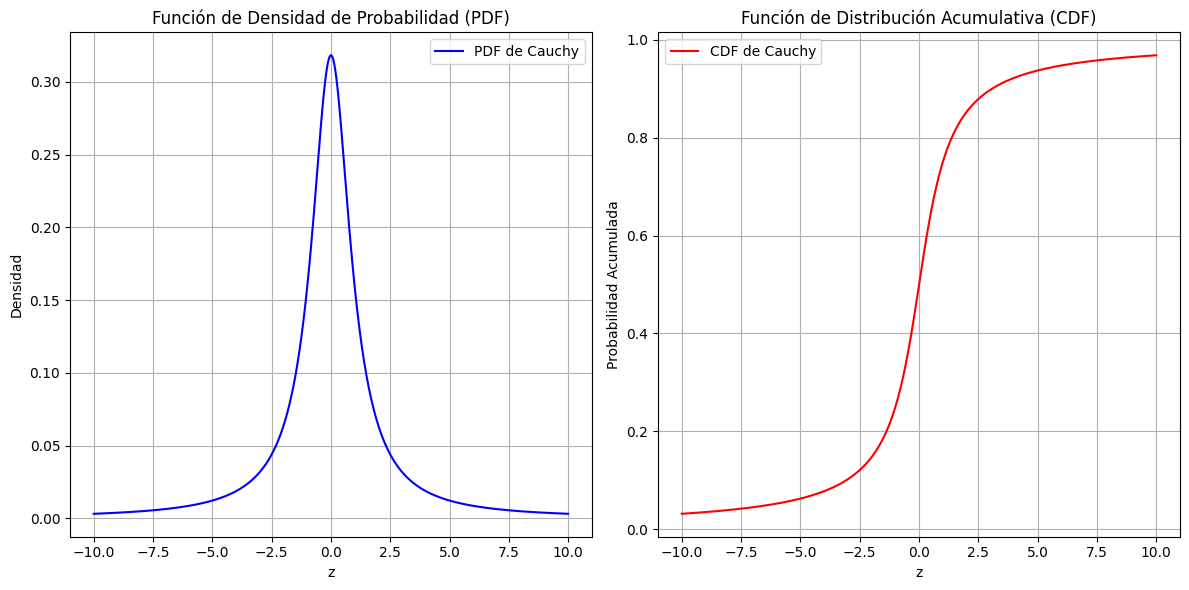

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Función de densidad de probabilidad (PDF) de la distribución de Cauchy
def cauchy_pdf(z):
    return 1 / (np.pi * (1 + z**2))

# Función de distribución acumulativa (CDF) de la distribución de Cauchy
def cauchy_cdf(z):
    return (1 / np.pi) * np.arctan(z) + 0.5

# Verificar que la PDF es una función de densidad válida
# La integral de la PDF en todo el dominio debe ser igual a 1
integral, _ = quad(cauchy_pdf, -np.inf, np.inf)
print(f"Integral de la PDF en (-∞, ∞): {integral}")  # Debería ser 1

# Crear un rango de valores para z
z_values = np.linspace(-10, 10, 1000)

# Calcular la PDF y la CDF para los valores de z
pdf_values = cauchy_pdf(z_values)
cdf_values = cauchy_cdf(z_values)

# Graficar la PDF y la CDF
plt.figure(figsize=(12, 6))

# Gráfica de la PDF
plt.subplot(1, 2, 1)
plt.plot(z_values, pdf_values, label="PDF de Cauchy", color="blue")
plt.title("Función de Densidad de Probabilidad (PDF)")
plt.xlabel("z")
plt.ylabel("Densidad")
plt.grid(True)
plt.legend()

# Gráfica de la CDF
plt.subplot(1, 2, 2)
plt.plot(z_values, cdf_values, label="CDF de Cauchy", color="red")
plt.title("Función de Distribución Acumulativa (CDF)")
plt.xlabel("z")
plt.ylabel("Probabilidad Acumulada")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()